In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
#生成模拟数据， 假设真实函数为 y = x^3 + 2 * x^2 - 3 * x + 4
x_data = np.sort( np.random.uniform(low=-1, high=1, size=100) )

In [3]:
#创建函数 计算y值
def func(x):
    return pow(x,3) + 2*pow(x,2) - 3*x + 4
y_data_func = func(x_data)

In [4]:
#加入噪声， 让y值在一个小的区域内波动
y_data = y_data_func + np.random.normal(scale=0.2, size=len(y_data_func))

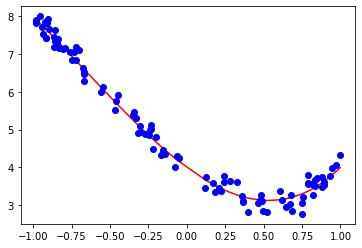

In [5]:
#绘制数据
plt.plot(x_data, y_data_func, color='r')
plt.plot(x_data, y_data, 'ob')

In [6]:
weights = tf.Variable( tf.random.normal([4,1]), dtype = tf.float32)
print(weights)

<tf.Variable 'Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[-1.0000229],
       [-0.3262331],
       [-1.2376724],
       [ 1.5191698]], dtype=float32)>


In [7]:
'''
def forward_func(x, w):
    return w[0]*pow(x,3) + w[1]*pow(x,2) + w[2]*x + w[3]
'''
x_input = tf.constant([pow(x_data,3), pow(x_data,2),x_data], dtype=tf.float32)
x_input = tf.transpose(x_input)
x_input = tf.constant(np.hstack([x_input, np.ones((x_input.shape[0],1))]), dtype=tf.float32)
def forward_func(x, w):
    return tf.matmul(x,w)

In [8]:
'''
@tf.function
def loss_func(y_compute):
    return tf.reduce_mean( tf.pow(y_compute-y_data, 2) )
'''
@tf.function
def loss_func(y_compute):
    return tf.reduce_mean( tf.pow(tf.reshape(y_compute,[y_compute.shape[0],]) - y_data,2))

In [9]:
learn_rate = 0.1
optimizer = tf.keras.optimizers.Adam(lr = learn_rate)
lastTime = time.time()
for index in range(3000):
    with tf.GradientTape() as tape:
        loss = loss_func( forward_func(x_input, weights) )
    gradient = tape.gradient(loss, weights)
    optimizer.apply_gradients([(gradient, weights)])
    if index % 500 == 0:
        print('loss = %f, time: %f'% (loss.numpy(), time.time()-lastTime))
        lastTime = time.time();
        
print('weights are : \n', weights.numpy())

loss = 12.985549, time: 0.524454
loss = 0.035839, time: 2.230594
loss = 0.035839, time: 2.283409
loss = 0.035839, time: 2.207211
loss = 0.035839, time: 2.215568
loss = 0.035839, time: 2.186373
weights are : 
 [[ 1.2386034]
 [ 2.0503476]
 [-3.1504877]
 [ 3.9881992]]


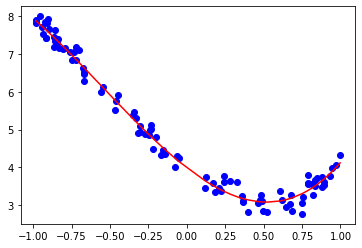

In [10]:
#绘制训练结果
plt.plot(x_data, y_data, 'ob')

y_pred = forward_func(x_input, weights)
plt.plot(x_data, y_pred, color='r')